In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import glob
import cmocean

%matplotlib inline

In [2]:
places.PLACES['S3']

{'lon lat': (-123.558, 49.125),
 'NEMO grid ji': (450, 258),
 'GEM2.5 grid ji': (138, 144)}

In [3]:
### Load a files for present day and pre industrial scenarios

In [4]:
now_mar=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/Lb80/SalishSea_1d_20150101_20150701_ptrc_T_20150315-20150315.nc')

In [5]:
pi_mar = nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/PI_Lb80/SalishSea_1d_20150101_20150701_ptrc_T_20150315-20150315.nc')

In [6]:
now_apr=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/Lb80/SalishSea_1d_20150101_20150701_ptrc_T_20150415-20150415.nc')

In [7]:
pi_apr = nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/PI_Lb80/SalishSea_1d_20150101_20150701_ptrc_T_20150415-20150415.nc')

In [8]:
now_may=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/Lb80/SalishSea_1d_20150101_20150701_ptrc_T_20150515-20150515.nc')

In [9]:
pi_may=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/PI_Lb80/SalishSea_1d_20150101_20150701_ptrc_T_20150515-20150515.nc')

In [10]:
now_jun=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/Lb80/SalishSea_1d_20150101_20150701_ptrc_T_20150615-20150615.nc')

In [11]:
pi_jun=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/PI_Lb80/SalishSea_1d_20150101_20150701_ptrc_T_20150615-20150615.nc')

In [12]:
now_jul=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/Lb80/SalishSea_1d_20150702_20151231_ptrc_T_20150715-20150715.nc')

In [13]:
pi_jul=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/PI_Lb80/SalishSea_1d_20150702_20151231_ptrc_T_20150715-20150715.nc')

In [14]:
now_aug=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/Lb80/SalishSea_1d_20150702_20151231_ptrc_T_20150815-20150815.nc')

In [15]:
pi_aug=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/PI_Lb80/SalishSea_1d_20150702_20151231_ptrc_T_20150815-20150815.nc')

In [16]:
print(now_mar.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'nitrate', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton'])


In [17]:
fe3t_mar=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/Lb80/SalishSea_1d_20150101_20150701_carp_T_20150315-20150315.nc')

In [18]:
fe3t_apr=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/Lb80/SalishSea_1d_20150101_20150701_carp_T_20150415-20150415.nc')

In [19]:
fe3t_may=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/Lb80/SalishSea_1d_20150101_20150701_carp_T_20150515-20150515.nc')

In [20]:
fe3t_jun=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/Lb80/SalishSea_1d_20150101_20150701_carp_T_20150615-20150615.nc')

In [21]:
fe3t_jul=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/Lb80/SalishSea_1d_20150702_20151231_carp_T_20150715-20150715.nc')

In [22]:
fe3t_aug=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/Lb80/SalishSea_1d_20150702_20151231_carp_T_20150815-20150815.nc')

In [23]:
#fe3t2=nc.Dataset('/data/sallen/results/MEOPAR/Karyn/Carbon/PI_Lb80/SalishSea_1d_20150101_20150701_carp_T_20150401-20150401.nc')

In [24]:
print(fe3t_mar.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'PAR', 'sigma_theta', 'e3t', 'Fraser_tracer', 'dissolved_inorganic_carbon', 'total_alkalinity', 'dissolved_oxygen', 'pH', 'CO2'])


In [25]:
# return times as datetime objects:
torig=dt.datetime.strptime(now_mar.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
print(torig)
times=np.array([torig + dt.timedelta(seconds=ii) for ii in now_mar.variables['time_centered'][:]])

1900-01-01 00:00:00


In [26]:
# load model mesh
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as fm:
    print(fm.variables.keys())
    tmask=fm.variables['tmask'][:,:,:,:]
    navlon=fm.variables['nav_lon'][:,:]
    navlat=fm.variables['nav_lat'][:,:]

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


### Depth Profile

Text(0.5, 0, 'Concentration ($\\mu$M)')

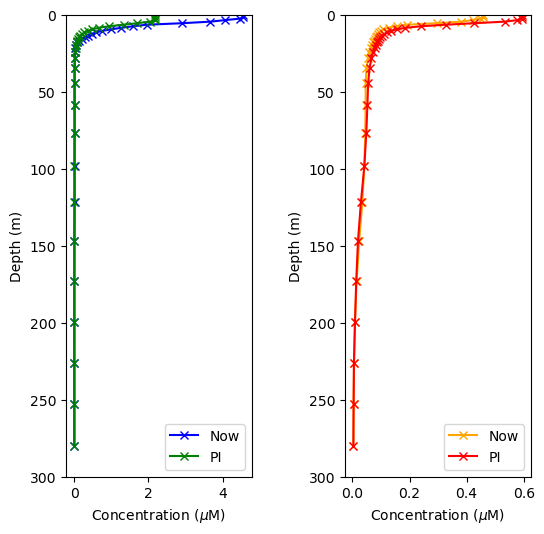

In [27]:
fig,ax=plt.subplots(1,2,figsize=(6,6))
fig.subplots_adjust(wspace=.5) # space the axes out more
il=12 # hour
# use location 'S3':
ij,ii=places.PLACES['S3']['NEMO grid ji']
ax[0].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,now_mar.variables['diatoms'][0,:,ij,ii]),now_mar.variables['deptht'][:],'b-x',label='Now')
ax[0].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,pi_mar.variables['diatoms'][0,:,ij,ii]),pi_mar.variables['deptht'][:],'g-x',label='PI')
ax[0].set_ylim(300,0)
ax[0].legend()
ax[0].set_xlabel('Concentration ($\mu$M)')
ax[0].set_ylabel('Depth (m)')
ax[1].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,now_mar.variables['flagellates'][0,:,ij,ii]),now_mar.variables['deptht'][:],'-x',color='orange',label='Now')
ax[1].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,pi_mar.variables['flagellates'][0,:,ij,ii]),pi_mar.variables['deptht'][:],'-x',color='r',label='PI')
ax[1].set_ylim(300,0)
ax[1].set_ylabel('Depth (m)')
ax[1].legend()
ax[1].set_xlabel('Concentration ($\mu$M)')

In [35]:
now_mar.variables['diatoms']

<class 'netCDF4._netCDF4.Variable'>
float32 diatoms(time_counter, deptht, y, x)
    standard_name: mole_concentration_of_diatoms_expressed_as_nitrogen_in_sea_water
    long_name: Diatoms Concentration
    units: mmol m-3
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 d
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (1, 40, 898, 398)
filling on

### Surface, Integrated plots - Aerial view

/tmp/ipykernel_2928555/1230042733.py:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1=ax[1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,shading='nearest')


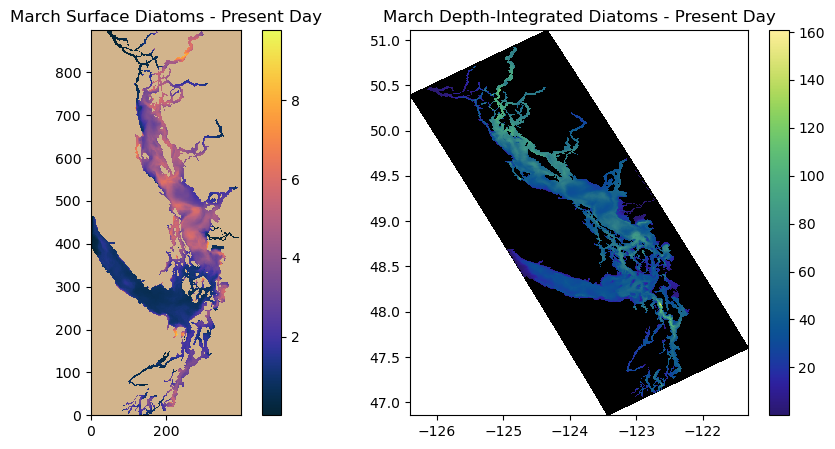

In [39]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')
cmap1=cmocean.cm.haline
cmap1.set_bad('k')
il=5
fig,ax=plt.subplots(1,2,figsize=(12,5))
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,now_mar.variables['diatoms'][0,0,:,:]),cmap=cmap0)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('March Surface Diatoms - Present Day')
fig.colorbar(m0,ax=ax[0])
# vertical sum of microzo in mmol/m3 * vertical grid thickness in m:
intuz=np.sum(now_mar.variables['diatoms'][0,:,:,:]*fe3t_mar.variables['e3t'][0,:,:,:]*tmask[0,:,:,:],0)
avguz=intuz/np.sum(fe3t_mar.variables['e3t'][0,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,shading='nearest')
viz_tools.set_aspect(ax[0],coords='map')
ax[1].set_title('March Depth-Integrated Diatoms - Present Day');
fig.colorbar(m1,ax=ax[1])

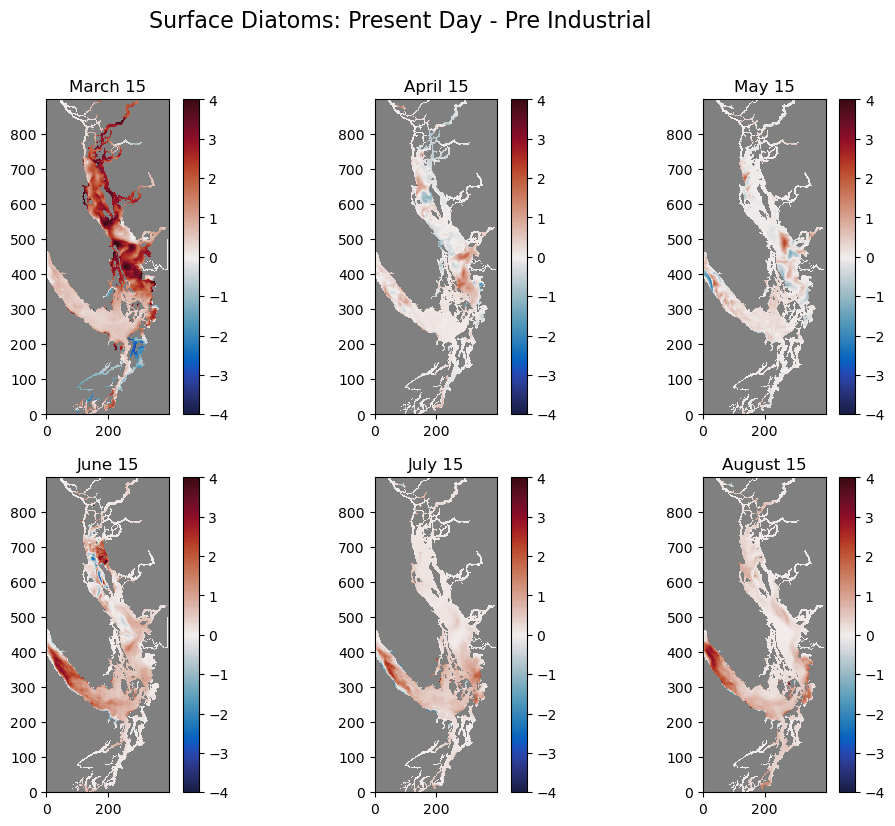

In [51]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('grey')
cmap1=cmocean.cm.balance
cmap1.set_bad('grey')
il=5
vmin=-4
vmax=4


fig,ax=plt.subplots(2,3,figsize=(12,9))

fig.suptitle('Surface Diatoms: Present Day - Pre Industrial', fontsize=16)

m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_mar.variables['diatoms'][0,0,:,:]-pi_mar.variables['diatoms'][0,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('March 15')
fig.colorbar(m0,ax=ax[0,0])


m1=ax[0,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_apr.variables['diatoms'][0,0,:,:]-pi_apr.variables['diatoms'][0,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('April 15')
fig.colorbar(m1,ax=ax[0,1])

m2=ax[0,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_may.variables['diatoms'][0,0,:,:]-pi_may.variables['diatoms'][0,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('May 15')
fig.colorbar(m2,ax=ax[0,2])


m3=ax[1,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_jun.variables['diatoms'][0,0,:,:]-pi_jun.variables['diatoms'][0,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('June 15')
fig.colorbar(m3,ax=ax[1,0])


m4=ax[1,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_jul.variables['diatoms'][0,0,:,:]-pi_jul.variables['diatoms'][0,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('July 15')
fig.colorbar(m4,ax=ax[1,1])

m5=ax[1,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_aug.variables['diatoms'][0,0,:,:]-pi_aug.variables['diatoms'][0,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('August 15')
fig.colorbar(m5,ax=ax[1,2])


In [52]:
now_mar_int=np.sum(now_mar.variables['diatoms'][0,10,:,:]*fe3t_mar.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)
pi_mar_int=np.sum(pi_mar.variables['diatoms'][0,10,:,:]*fe3t_mar.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)

now_apr_int=np.sum(now_apr.variables['diatoms'][0,10,:,:]*fe3t_apr.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)
pi_apr_int=np.sum(pi_apr.variables['diatoms'][0,10,:,:]*fe3t_apr.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)

now_may_int=np.sum(now_may.variables['diatoms'][0,10,:,:]*fe3t_may.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)
pi_may_int=np.sum(pi_may.variables['diatoms'][0,10,:,:]*fe3t_may.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)

now_jun_int=np.sum(now_jun.variables['diatoms'][0,10,:,:]*fe3t_jun.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)
pi_jun_int=np.sum(pi_jun.variables['diatoms'][0,10,:,:]*fe3t_jun.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)

now_jul_int=np.sum(now_jul.variables['diatoms'][0,10,:,:]*fe3t_jul.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)
pi_jul_int=np.sum(pi_jul.variables['diatoms'][0,10,:,:]*fe3t_jul.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)

now_aug_int=np.sum(now_aug.variables['diatoms'][0,10,:,:]*fe3t_aug.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)
pi_aug_int=np.sum(pi_aug.variables['diatoms'][0,10,:,:]*fe3t_aug.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)

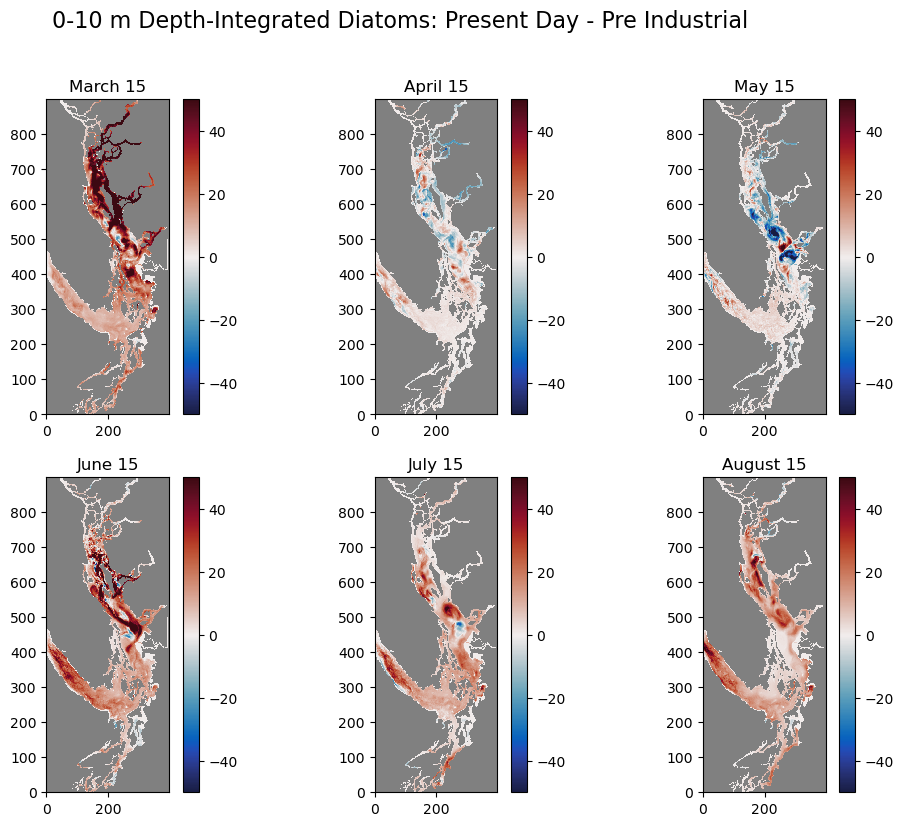

In [56]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('grey')
cmap1=cmocean.cm.balance
cmap1.set_bad('grey')
il=5
vmin=-50
vmax=50


fig,ax=plt.subplots(2,3,figsize=(12,9))

fig.suptitle('0-10 m Depth-Integrated Diatoms: Present Day - Pre Industrial', fontsize=16)

m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_mar_int-pi_mar_int)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('March 15')
fig.colorbar(m0,ax=ax[0,0])


m1=ax[0,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_apr_int-pi_apr_int)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('April 15')
fig.colorbar(m1,ax=ax[0,1])

m2=ax[0,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_may_int-pi_may_int)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('May 15')
fig.colorbar(m2,ax=ax[0,2])


m3=ax[1,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_jun_int-pi_jun_int)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('June 15')
fig.colorbar(m3,ax=ax[1,0])


m4=ax[1,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_jul_int-pi_jul_int)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('July 15')
fig.colorbar(m4,ax=ax[1,1])

m5=ax[1,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_aug_int-pi_aug_int)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('August 15')
fig.colorbar(m5,ax=ax[1,2])

In [57]:
print(now_apr.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'nitrate', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton'])


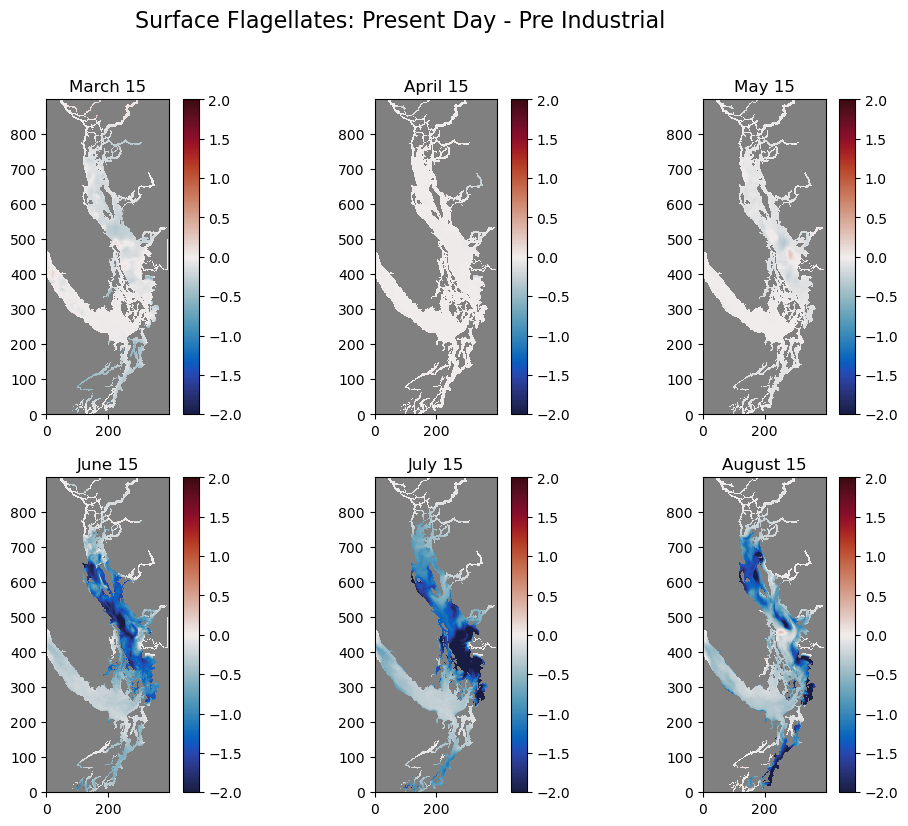

In [58]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('grey')
cmap1=cmocean.cm.balance
cmap1.set_bad('grey')
il=5
vmin=-2
vmax=2


fig,ax=plt.subplots(2,3,figsize=(12,9))

fig.suptitle('Surface Flagellates: Present Day - Pre Industrial', fontsize=16)

m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_mar.variables['flagellates'][0,0,:,:]-pi_mar.variables['flagellates'][0,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('March 15')
fig.colorbar(m0,ax=ax[0,0])


m1=ax[0,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_apr.variables['flagellates'][0,0,:,:]-pi_apr.variables['flagellates'][0,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('April 15')
fig.colorbar(m1,ax=ax[0,1])

m2=ax[0,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_may.variables['flagellates'][0,0,:,:]-pi_may.variables['flagellates'][0,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('May 15')
fig.colorbar(m2,ax=ax[0,2])


m3=ax[1,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_jun.variables['flagellates'][0,0,:,:]-pi_jun.variables['flagellates'][0,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('June 15')
fig.colorbar(m3,ax=ax[1,0])


m4=ax[1,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_jul.variables['flagellates'][0,0,:,:]-pi_jul.variables['flagellates'][0,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('July 15')
fig.colorbar(m4,ax=ax[1,1])

m5=ax[1,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_aug.variables['flagellates'][0,0,:,:]-pi_aug.variables['flagellates'][0,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('August 15')
fig.colorbar(m5,ax=ax[1,2])

In [59]:
now_mar_int_flag=np.sum(now_mar.variables['flagellates'][0,10,:,:]*fe3t_mar.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)
pi_mar_int_flag=np.sum(pi_mar.variables['flagellates'][0,10,:,:]*fe3t_mar.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)

now_apr_int_flag=np.sum(now_apr.variables['flagellates'][0,10,:,:]*fe3t_apr.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)
pi_apr_int_flag=np.sum(pi_apr.variables['flagellates'][0,10,:,:]*fe3t_apr.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)

now_may_int_flag=np.sum(now_may.variables['flagellates'][0,10,:,:]*fe3t_may.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)
pi_may_int_flag=np.sum(pi_may.variables['flagellates'][0,10,:,:]*fe3t_may.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)

now_jun_int_flag=np.sum(now_jun.variables['flagellates'][0,10,:,:]*fe3t_jun.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)
pi_jun_int_flag=np.sum(pi_jun.variables['flagellates'][0,10,:,:]*fe3t_jun.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)

now_jul_int_flag=np.sum(now_jul.variables['flagellates'][0,10,:,:]*fe3t_jul.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)
pi_jul_int_flag=np.sum(pi_jul.variables['flagellates'][0,10,:,:]*fe3t_jul.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)

now_aug_int_flag=np.sum(now_aug.variables['flagellates'][0,10,:,:]*fe3t_aug.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)
pi_aug_int_flag=np.sum(pi_aug.variables['flagellates'][0,10,:,:]*fe3t_aug.variables['e3t'][0,10,:,:]*tmask[0,:,:,:],0)

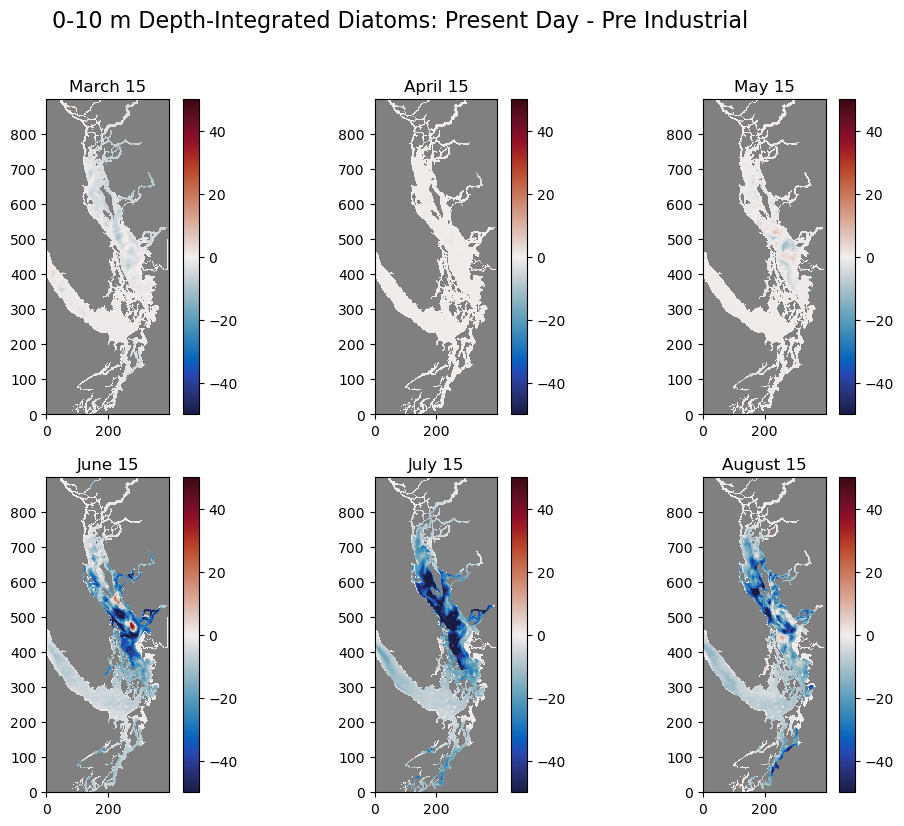

In [60]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('grey')
cmap1=cmocean.cm.balance
cmap1.set_bad('grey')
il=5
vmin=-50
vmax=50


fig,ax=plt.subplots(2,3,figsize=(12,9))

fig.suptitle('0-10 m Depth-Integrated Diatoms: Present Day - Pre Industrial', fontsize=16)

m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_mar_int_flag-pi_mar_int_flag)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('March 15')
fig.colorbar(m0,ax=ax[0,0])


m1=ax[0,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_apr_int_flag-pi_apr_int_flag)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('April 15')
fig.colorbar(m1,ax=ax[0,1])

m2=ax[0,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_may_int_flag-pi_may_int_flag)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('May 15')
fig.colorbar(m2,ax=ax[0,2])


m3=ax[1,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_jun_int_flag-pi_jun_int_flag)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('June 15')
fig.colorbar(m3,ax=ax[1,0])


m4=ax[1,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_jul_int_flag-pi_jul_int_flag)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('July 15')
fig.colorbar(m4,ax=ax[1,1])

m5=ax[1,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(now_aug_int_flag-pi_aug_int_flag)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('August 15')
fig.colorbar(m5,ax=ax[1,2])

In [61]:
#open bathy file and meshmask
fbathy=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
fmesh=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

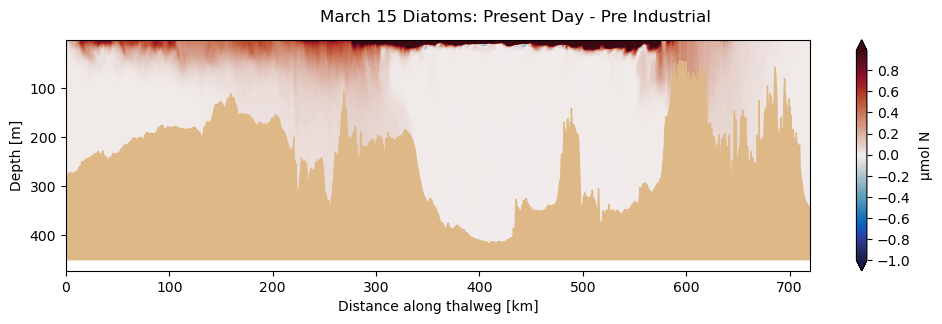

In [62]:
fig,ax=plt.subplots(1,1,figsize=(12,3)) 
levels = np.arange(-1, 1, 0.01)
fig.suptitle('March 15 Diatoms: Present Day - Pre Industrial')
cb=visualisations.contour_thalweg(ax,(now_mar.variables['diatoms'][0,:,:]-pi_mar.variables['diatoms'][0,:,:]),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.balance)
cb.set_label('\u03bcmol N', rotation=90,labelpad=6)

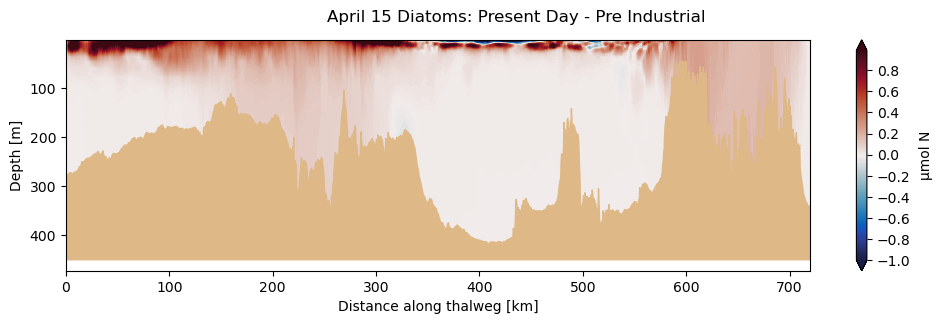

In [63]:
fig,ax=plt.subplots(1,1,figsize=(12,3)) 
levels = np.arange(-1, 1, 0.01)
fig.suptitle('April 15 Diatoms: Present Day - Pre Industrial')
cb=visualisations.contour_thalweg(ax,(now_apr.variables['diatoms'][0,:,:]-pi_mar.variables['diatoms'][0,:,:]),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.balance)
cb.set_label('\u03bcmol N', rotation=90,labelpad=6)

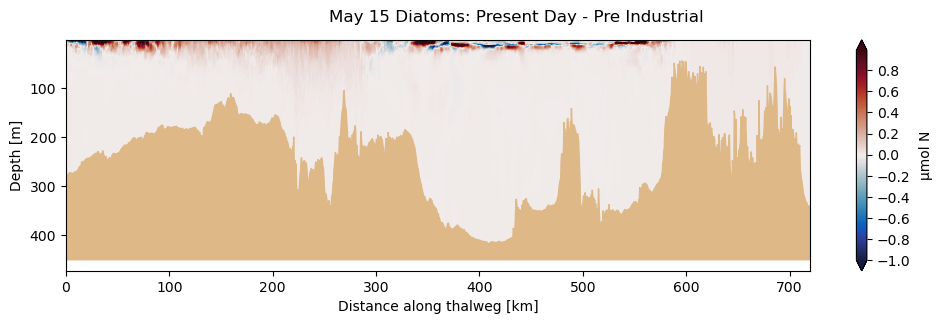

In [64]:
fig,ax=plt.subplots(1,1,figsize=(12,3)) 
levels = np.arange(-1, 1, 0.01)
fig.suptitle('May 15 Diatoms: Present Day - Pre Industrial')
cb=visualisations.contour_thalweg(ax,(now_may.variables['diatoms'][0,:,:]-pi_may.variables['diatoms'][0,:,:]),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.balance)
cb.set_label('\u03bcmol N', rotation=90,labelpad=6)

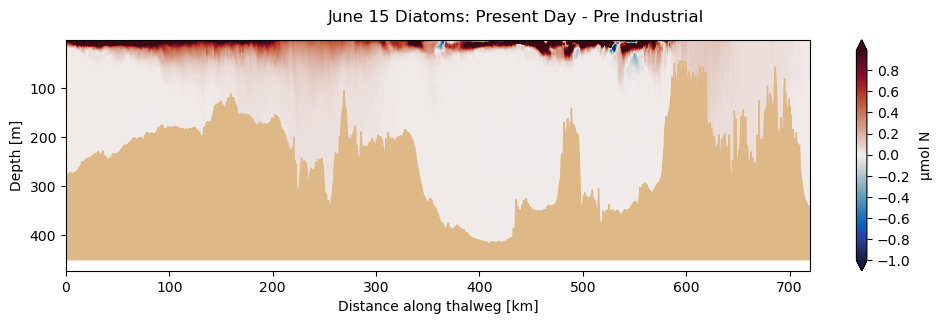

In [65]:
fig,ax=plt.subplots(1,1,figsize=(12,3)) 
levels = np.arange(-1, 1, 0.01)
fig.suptitle('June 15 Diatoms: Present Day - Pre Industrial')
cb=visualisations.contour_thalweg(ax,(now_jun.variables['diatoms'][0,:,:]-pi_jun.variables['diatoms'][0,:,:]),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.balance)
cb.set_label('\u03bcmol N', rotation=90,labelpad=6)

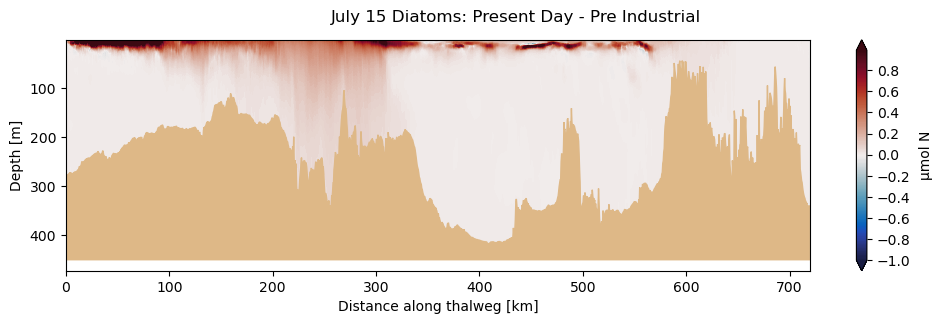

In [66]:
fig,ax=plt.subplots(1,1,figsize=(12,3)) 
levels = np.arange(-1, 1, 0.01)
fig.suptitle('July 15 Diatoms: Present Day - Pre Industrial')
cb=visualisations.contour_thalweg(ax,(now_jul.variables['diatoms'][0,:,:]-pi_jul.variables['diatoms'][0,:,:]),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.balance)
cb.set_label('\u03bcmol N', rotation=90,labelpad=6)

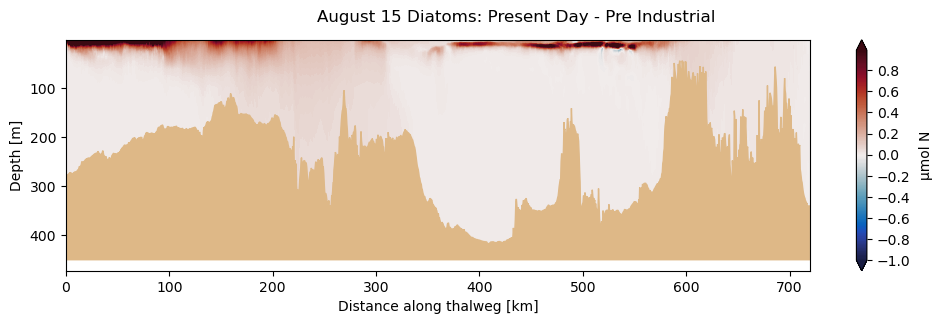

In [67]:
fig,ax=plt.subplots(1,1,figsize=(12,3)) 
levels = np.arange(-1, 1, 0.01)
fig.suptitle('August 15 Diatoms: Present Day - Pre Industrial')
cb=visualisations.contour_thalweg(ax,(now_aug.variables['diatoms'][0,:,:]-pi_aug.variables['diatoms'][0,:,:]),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.balance)
cb.set_label('\u03bcmol N', rotation=90,labelpad=6)

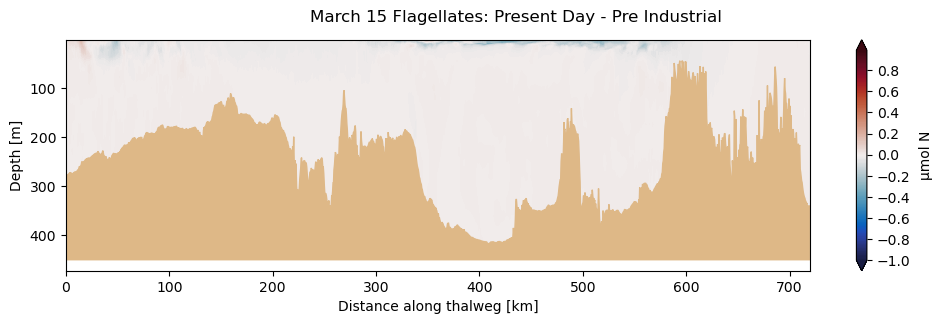

In [68]:
fig,ax=plt.subplots(1,1,figsize=(12,3)) 
levels = np.arange(-1, 1, 0.01)
fig.suptitle('March 15 Flagellates: Present Day - Pre Industrial')
cb=visualisations.contour_thalweg(ax,(now_mar.variables['flagellates'][0,:,:]-pi_mar.variables['flagellates'][0,:,:]),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.balance)
cb.set_label('\u03bcmol N', rotation=90,labelpad=6)

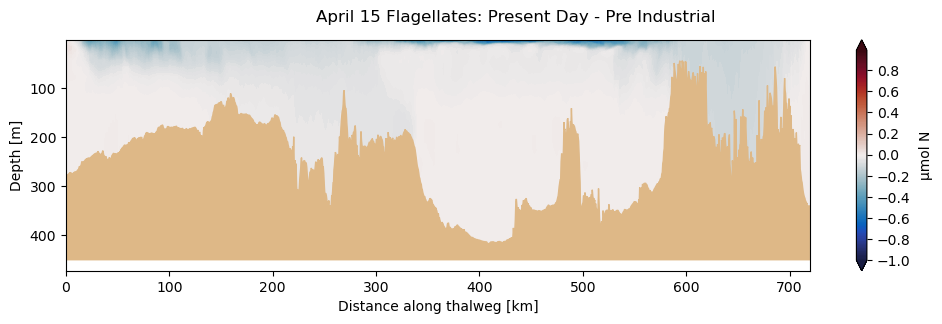

In [69]:
fig,ax=plt.subplots(1,1,figsize=(12,3)) 
levels = np.arange(-1, 1, 0.01)
fig.suptitle('April 15 Flagellates: Present Day - Pre Industrial')
cb=visualisations.contour_thalweg(ax,(now_apr.variables['flagellates'][0,:,:]-pi_mar.variables['flagellates'][0,:,:]),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.balance)
cb.set_label('\u03bcmol N', rotation=90,labelpad=6)

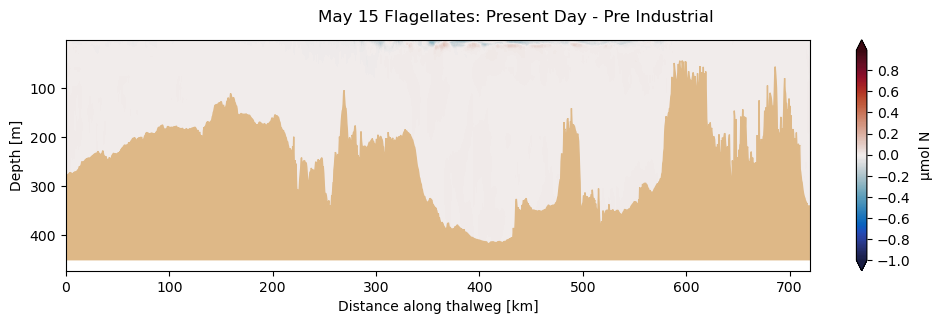

In [70]:
fig,ax=plt.subplots(1,1,figsize=(12,3)) 
levels = np.arange(-1, 1, 0.01)
fig.suptitle('May 15 Flagellates: Present Day - Pre Industrial')
cb=visualisations.contour_thalweg(ax,(now_may.variables['flagellates'][0,:,:]-pi_may.variables['flagellates'][0,:,:]),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.balance)
cb.set_label('\u03bcmol N', rotation=90,labelpad=6)

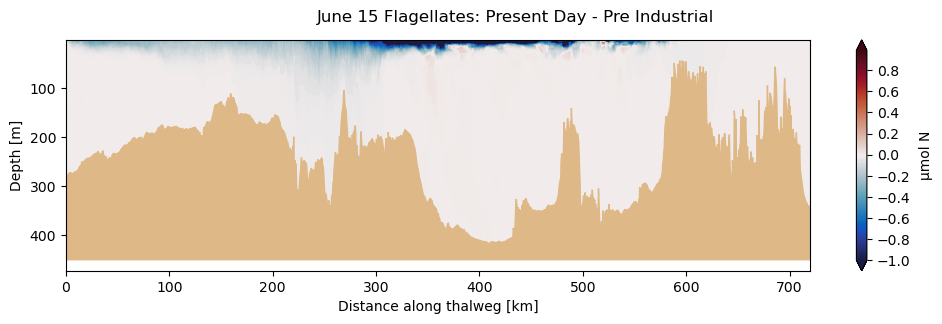

In [71]:
fig,ax=plt.subplots(1,1,figsize=(12,3)) 
levels = np.arange(-1, 1, 0.01)
fig.suptitle('June 15 Flagellates: Present Day - Pre Industrial')
cb=visualisations.contour_thalweg(ax,(now_jun.variables['flagellates'][0,:,:]-pi_jun.variables['flagellates'][0,:,:]),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.balance)
cb.set_label('\u03bcmol N', rotation=90,labelpad=6)

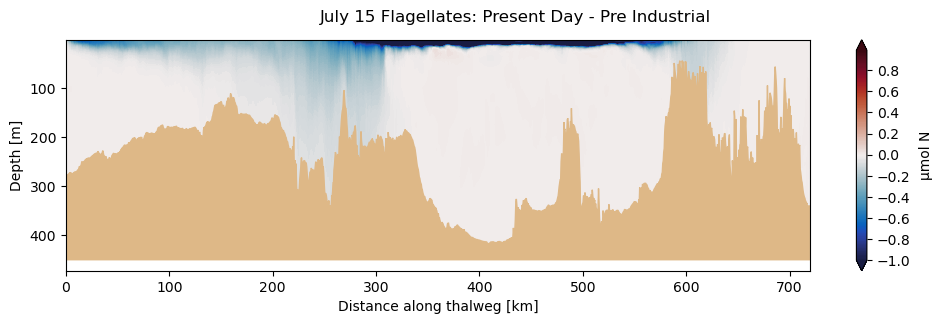

In [72]:
fig,ax=plt.subplots(1,1,figsize=(12,3)) 
levels = np.arange(-1, 1, 0.01)
fig.suptitle('July 15 Flagellates: Present Day - Pre Industrial')
cb=visualisations.contour_thalweg(ax,(now_jul.variables['flagellates'][0,:,:]-pi_jul.variables['flagellates'][0,:,:]),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.balance)
cb.set_label('\u03bcmol N', rotation=90,labelpad=6)

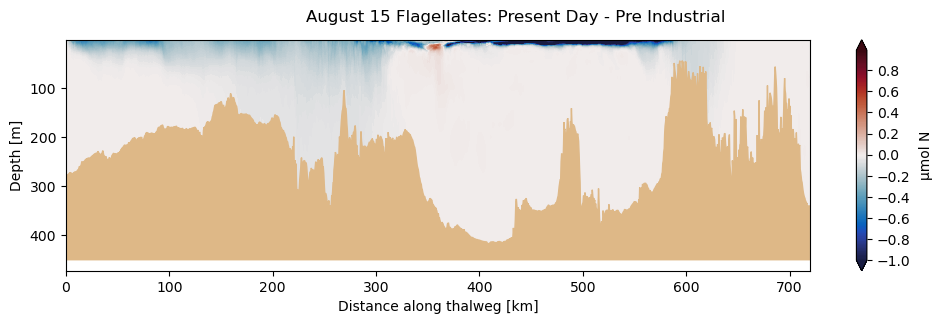

In [73]:
fig,ax=plt.subplots(1,1,figsize=(12,3)) 
levels = np.arange(-1, 1, 0.01)
fig.suptitle('August 15 Flagellates: Present Day - Pre Industrial')
cb=visualisations.contour_thalweg(ax,(now_aug.variables['flagellates'][0,:,:]-pi_aug.variables['flagellates'][0,:,:]),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.balance)
cb.set_label('\u03bcmol N', rotation=90,labelpad=6)

In [74]:
now_mar.close()
pi_mar.close()
fe3t_mar.close()

In [75]:
now_apr.close()
pi_apr.close()
fe3t_apr.close()

In [76]:
now_may.close()
pi_may.close()
fe3t_may.close()

In [77]:
now_jun.close()
pi_jun.close()
fe3t_jun.close()

In [78]:
now_jul.close()
pi_jul.close()
fe3t_jul.close()

In [79]:
now_aug.close()
pi_aug.close()
fe3t_aug.close()

In [80]:
#open bathy file and meshmask
fbathy=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
fmesh=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')